In [1]:
# DTEGraph (Double Triangle Expandable eGraph) is based on eGraph and inherits all of its functions. 
## DTEGraph has additional functions to deal with double triangle expansion and reduction.

sys.path.append('..')

from eGraph.DTEGraph import DTEGraph

import common.graphs as cg
import common.functions as cf

In [2]:
# Double Triangle Expansion

## There are several ways to define double triangle expansion. The definition used here is:
### Double triangle expansion is an operation on two distinct edges e1 and e2 of a graph G. The edges are 
### subdivided and the resultant degree 2 vertices are identified. Furthermore, we require that e1 is 
### an edge of some triangle T, and that e2 is not an edge of T, is incident to a vertex in T, and is not 
### adjacent to e1. Another way to think about it is that it is an operation on a triangle and edge subgraph
### H of G, whereby the (only) two non-adjacent edges in H are subdivided and the resultant degree 2
### vertices are identified.

# Double Triangle Reduction

## Similarly, there are several ways to define double triangle reduction. The definition used here is:
### Double triangle reduction is an operation that takes a double triangle with vertices [0,1,2,3], where
### [0,2] is the common edge between the two triangles, in a graph G. The edges (0,3),(1,3) and (2,3) are
### deleted, and vertex 0 and vertex 3 are identified. We usually require further that the double triangle
### is not a subgraph of some triple triangle in G. This is necessary for some results by Schnetz related 
### to the ancestor of a family.

# Double Triangle Ancestor

## The double triangle ancestor of a graph G is the graph A that you get by repeatedly reducing double
### triangles, starting from G, until unable to do so. Again, we usually require that the double triangles
### are not part of triple triangles.
## Note that this definition is slightly different from Schnetz's original definition of ancestor, which 
### includes product splits, an operation that he proved commutes with double triangle reduction.

1) True


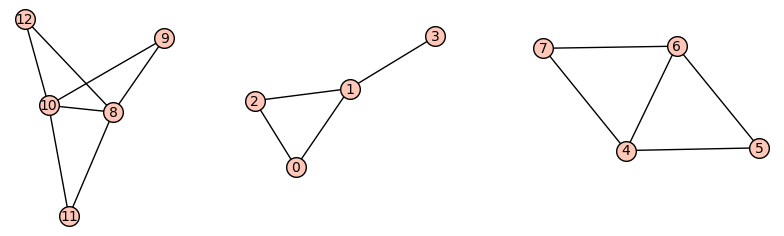

In [3]:
# Some relevant subgraphs

## Triangle and Edge AKA Tadpole(3,1) (Note that the vertex labelling is different between the two.)
TE = cg.triangle_and_edge() # Vertices = [0,1,2,3]
TP = graphs.TadpoleGraph(3,1)

cf.num_print(1, TE.is_isomorphic(TP)) # Should be True.
#cf.num_print(2, TE == TP)  #Takes a while. Unsure why.

DT = cg.double_triangle()
DT.relabel([i+max(TE.vertices())+1 for i in range(0,4)]) # Vertices = [4,5,6,7]

TT = cg.triple_triangle()
TT.relabel([i+max(DT.vertices())+1 for i in range(0,5)]) # Vertices = [8,9,10,11,12]

G = TE.union(DT).union(TT)
G.plot() # Might not be drawn in the same order.

In [4]:
# DTE

G = DTEGraph(cg.K5())

cf.num_print(2, G.is_isomorphic(cg.Z(3))) # K_5 is isomorphic to Z_3.

e1, e2 = G.triangle_and_edge_iterator(return_edges=True).next()[0:2] 
# The first two edges (out of 4) are the ones to be taken as input into DTE.

G1 = G.DTE(e1,e2)

cf.num_print(3, G1.is_isomorphic(cg.Z(4))) # G1 should be isomorphic to the 1-zigzag Z_4.

e1, e2 = G1.triangle_and_edge_iterator(return_edges=True).next()[0:2]

G2 = G1.DTE(e1,e2) 

cf.num_print(4, G2.is_isomorphic(cg.Z(5))) # G2 should be isomorphic to the 1-zigzag Z_5.

2) True
3) True
4) True


In [5]:
# DTR

H2 = G2.DTR() # If called without any arguments, DTR will try to find a double triangle and reduce it.

cf.num_print(5, H2.is_isomorphic(G1)) # This should be true.

H1 = G1.DTR()

cf.num_print(6, H1.is_isomorphic(G)) # This should be true.

from eGraph.DTEGraph import NoProperDoubleTriangles

## As G is K5, it has no double triangles that are not part of triple triangles. G.DTR() raises a
### NoProperDoubleTriangles that could be caught.
try:
    H = G.DTR() 
    
except NoProperDoubleTriangles:
    cf.num_print(7, 'NoProperDoubleTriangles')

5) True
6) True
7) NoProperDoubleTriangles


In [6]:
# Double Triangle Ancestor

A = G.ancestor() # G is K_5, G1 is G after one DTE. G2 is G1 after one DTE.
A1 = G1.ancestor()
A2 = G2.ancestor()

ancestor_is_K5 = A.is_isomorphic(cg.K5()) and A1.is_isomorphic(cg.K5()) and A2.is_isomorphic(cg.K5())

cf.num_print(7, ancestor_is_K5) # Should be True

7) True


In [9]:
# Children
## We could also iterate over the children of a graph.

G = DTEGraph(cg.K5())

cf.num_print(8, len(list(G.children_iterator())))
### Default is to return all the labelled children. 
### There are (5 choose 2) edges * 3 opposite edges /2 = 15 unique labelled children of K5.

cf.num_print(9, len(list(G.children_iterator(only_nonisomorphic = True))))
# There is only one child of K5 up to isomorphism.

8) 15
9) 1


In [10]:
# Some subgraph checks
## It might be useful sometimes to check if graph has a 4-clique or a triple triangle.

G = DTEGraph(cg.K5())

cf.num_print(10, G.has_K4()) # True
cf.num_print(11, G.has_T3()) # True

10) True
11) True
